In [1]:
%matplotlib notebook

import numpy

import matplotlib.pyplot as pyplot
import seaborn as sns
sns.set(color_codes=True)

In [10]:
input_eigvals_file = "/Volumes/data/user_work/dlahr/analysis/temp/eigvals.bin"
input_eigvect_file = "/Volumes/data/user_work/dlahr/analysis/temp/eigmat.bin"

In [2]:
distance_atomic_units = 5.291772109e-11 # in meters
max_N_basis_each_dim = 50 #max number of plane wave basis functions in each dimension
print(distance_atomic_units, max_N_basis_each_dim)

5.291772109e-11 50


In [3]:
lattice_constant = 100e-10 / distance_atomic_units  #100 Å converted to atomic units
print("lattice_constant:  {}".format(lattice_constant))
print("H-atom radius in atomic units:  ", 1.2e-10 / distance_atomic_units)

lattice_constant:  188.97261246364832
H-atom radius in atomic units:   2.2676713495637797


In [4]:
unit_cell_volume = numpy.power(lattice_constant, 3.)
print(unit_cell_volume)
print(1./unit_cell_volume)

6748334.494715145
1.481847114696426e-07


In [5]:
""" 
for each reciprical lattice dimension
k = 2 pi m / lattice_constant
where m is an integer >= 0

kinetic energy of the waves is (atomic units):
KE = k^2 / 2

max k in single dimension:
2 pi max_N_basis_each_dim / lattice_constant

KE of above:
((2 pi max_N_basis_each_dim) / lattice_constant)^2 / 2

""" 

# maximum k in single dimension
max_k = 2 * numpy.pi * max_N_basis_each_dim / lattice_constant
print("max_k:  {}".format(max_k))

max_KE = max_k * max_k / 2.
print("max_KE:  {}".format(max_KE))

max_k:  1.6624592382105767
max_KE:  1.3818853593558456


In [6]:
basis_k_indexes = []
for i in range(max_N_basis_each_dim):
    for j in range(max_N_basis_each_dim):
        for k in range(max_N_basis_each_dim):
            if i != 0 or j !=0 or k != 0:
                t = numpy.sqrt(i*i + j*j + k*k)
                if t <= max_N_basis_each_dim:
                    basis_k_indexes.append((i,j,k))

# for j in range(3):
#     for i in range(1,max_N_basis_each_dim+1):
#         cur_vect = numpy.zeros(3)
#         cur_vect[j] = i
#         basis_k_indexes.append(cur_vect)

print(len(basis_k_indexes))
print(basis_k_indexes[:10])
basis_k_indexes = numpy.array(basis_k_indexes)
print(basis_k_indexes.shape)
print(basis_k_indexes[:10,:])

68389
[(0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 0, 6), (0, 0, 7), (0, 0, 8), (0, 0, 9), (0, 0, 10)]
(68389, 3)
[[ 0  0  1]
 [ 0  0  2]
 [ 0  0  3]
 [ 0  0  4]
 [ 0  0  5]
 [ 0  0  6]
 [ 0  0  7]
 [ 0  0  8]
 [ 0  0  9]
 [ 0  0 10]]


In [7]:
N_basis = basis_k_indexes.shape[0]
print(N_basis)

68389


In [8]:
basis_k_indexes_norm_sq = numpy.sum(numpy.power(basis_k_indexes, 2), axis=1)
print(basis_k_indexes_norm_sq.shape)
print(basis_k_indexes_norm_sq[:10])

k_coef = 2. * numpy.pi / lattice_constant
print("k_coef", k_coef)

basis_k_norm_sq = basis_k_indexes_norm_sq * numpy.power(k_coef, 2.0)
print(basis_k_norm_sq.shape)
print(basis_k_norm_sq[:10])

(68389,)
[  1   4   9  16  25  36  49  64  81 100]
k_coef 0.033249184764211535
(68389,)
[0.00110551 0.00442203 0.00994957 0.01768813 0.02763771 0.0397983
 0.05416991 0.07075253 0.08954617 0.11055083]


In [9]:
basis_KE = 0.5 * basis_k_norm_sq
print(basis_KE[:10])

[0.00055275 0.00221102 0.00497479 0.00884407 0.01381885 0.01989915
 0.02708495 0.03537627 0.04477309 0.05527541]


In [11]:
eigvals = numpy.memmap(input_eigvals_file, dtype=numpy.float32)
eigmat = numpy.memmap(input_eigvect_file, dtype=numpy.float32, shape=(eigvals.shape[0], eigvals.shape[0]))

<IPython.core.display.Javascript object>


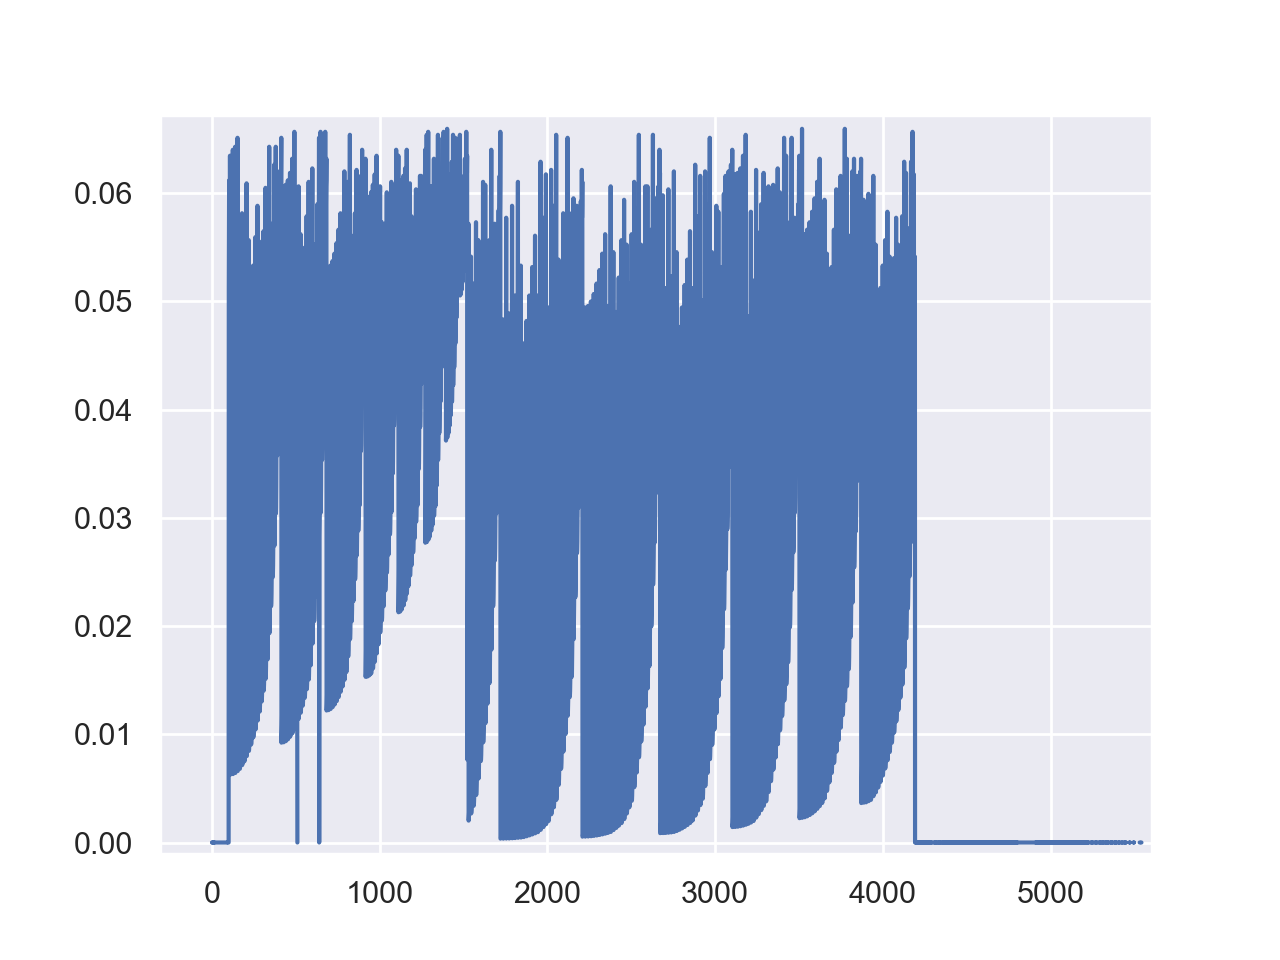

In [12]:
title = """eigenvalues 1"""
pyplot.figure(title)
pyplot.plot(eigvals)

In [ ]:
N = N_basis

basis_dim = 2
cur_eig_vect = eigmat[:,0]

x = numpy.linspace(-lattice_constant/2., lattice_constant/2., num=100)
dx = x[1] - x[0]
print("dx:  ", dx)

# x = numpy.linspace(0., lattice_constant, num=100)
y = numpy.zeros(x.shape[0])
print("shapes:  ", x.shape, y.shape)

for i in range(N):
    cur_basis = basis_k_indexes[i,]
#     print(cur_basis)
    cur_k = cur_basis[basis_dim] * 2 * numpy.pi / lattice_constant
#     print(cur_k)
    cur_basis_r = numpy.exp(1j * cur_k * x)
#     print(cur_basis_r[:10])
    
    y = y + cur_eig_vect[i] * cur_basis_r

y = y*numpy.power(lattice_constant, -1.5)
prob_dens = numpy.conj(y)*y
t = numpy.sum(prob_dens)
print(t, t*dx)


title = """wavefun 1"""
pyplot.figure(title)
pyplot.plot(x,numpy.real(y))
pyplot.plot(x,numpy.imag(y))
title = """prob dens 1"""
pyplot.figure(title)
pyplot.plot(x,prob_dens)

In [ ]:
pyplot.figure(-4)
pyplot.plot(cur_eig_vect)

t = sorted(cur_eig_vect)
f = numpy.linspace(0., 1., num=len(t))

pyplot.figure(4)
pyplot.semilogx(t, f, '.')